Loading dataset IMDB

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# labels - true/false right result

Look at training data

In [2]:
print ( train_data[0] )
print ( train_labels[0] )

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
print ( max ( max(sequense) for sequense in train_data) )

9999


Deciphering one of the reviews

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print (decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Encoding sequences of integers into a binary matrix

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros( (len(sequences), dimension), dtype=float)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
print ( x_train[0] )

[0. 1. 1. ... 0. 0. 0.]


Building the network

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# relu(dot(W, input) + b) W.shape = (input_dimension = 10000, hidden unit = 16)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
# There is available to set up optimizer or use custom's loss functions and metrics
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [10]:
# Labels vectorization
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Prepare validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Run the learning process

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5346 - binary_accuracy: 0.7682 - val_loss: 0.4034 - val_binary_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3209 - binary_accuracy: 0.9031 - val_loss: 0.3124 - val_binary_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2344 - binary_accuracy: 0.9251 - val_loss: 0.2868 - val_binary_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1844 - binary_accuracy: 0.9413 - val_loss: 0.2940 - val_binary_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1515 - binary_accuracy: 0.9505 - val_loss: 0.2957 - val_binary_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1223 - binary_accuracy: 0.9623 - val_loss: 0.2863 - val_binary_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - los

Processing of results

In [12]:
# fit returns object History with the field history that contains all information about the learning process
history_dict = history.history
print ( history_dict.keys() )

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


In [13]:
import matplotlib.pyplot as plt

In [14]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [18]:
acc = history_dict['binary_accuracy']
epochs = range (1, len(acc) + 1)
val_acc_values = history_dict['val_binary_accuracy']

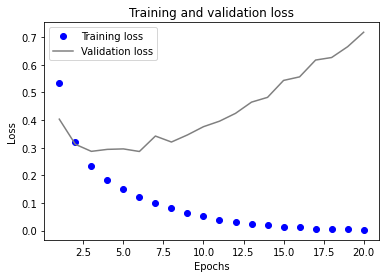

In [19]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

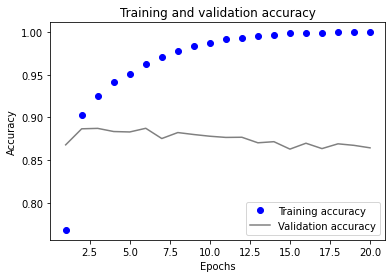

In [20]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'grey', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Adjustment of hyperparameters to improve metrics

In [24]:
model_2 = models.Sequential()

model_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_2.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)
print( result )

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4500 - accuracy: 0.8226
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2574 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2013 - accuracy: 0.9292
Epoch 4/4
782/782 [==============================] - 1s 843us/step - loss: 0.7895 - binary_accuracy: 0.8504
[0.7895206212997437, 0.8503999710083008]


In [25]:
model.predict(x_test)

array([[2.4616420e-03],
       [1.0000000e+00],
       [8.4066617e-01],
       ...,
       [7.3567033e-04],
       [2.0036697e-03],
       [4.7186625e-01]], dtype=float32)

In [26]:
model_2.predict(x_test)

array([[0.1744616 ],
       [0.99990165],
       [0.92192936],
       ...,
       [0.12692323],
       [0.06898758],
       [0.6590467 ]], dtype=float32)

Experiments

In [27]:
# Дополнительный слой - больше потерь на новых данных
model_3 = models.Sequential()

model_3.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model_3.add(layers.Dense(16, activation='relu'))
model_3.add(layers.Dense(16, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5426 - accuracy: 0.7731 - val_loss: 0.4016 - val_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3178 - accuracy: 0.8987 - val_loss: 0.3437 - val_accuracy: 0.8612
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2263 - accuracy: 0.9249 - val_loss: 0.2774 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1722 - accuracy: 0.9439 - val_loss: 0.3194 - val_accuracy: 0.8707
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1362 - accuracy: 0.9568 - val_loss: 0.3045 - val_accuracy: 0.8841
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1126 - accuracy: 0.9640 - val_loss: 0.3025 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0895 - accuracy: 0.9719 - val_loss: 0.3235 - val_accuracy: 0.8833
Epoch 8/20
30

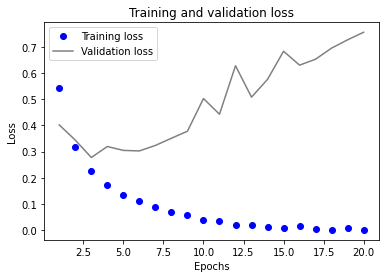

In [28]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy'] # edit.
epochs = range (1, len(acc) + 1)
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'grey', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

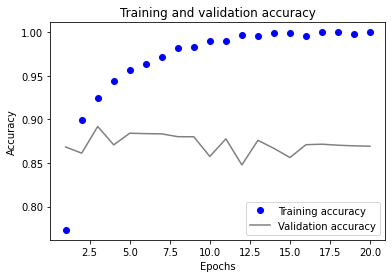

In [29]:
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'grey', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [44]:
# Больше скрытых нейронов - больше моментов переобучения
model_4 = models.Sequential()

model_4.add(layers.Dense(32, activation='relu', input_shape = (10000,)))
model_4.add(layers.Dense(32, activation='relu', input_shape = (10000,)))
model_4.add(layers.Dense(1, activation='sigmoid'))

model_4.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 31ms/step - loss: 0.4940 - accuracy: 0.7795 - val_loss: 0.4136 - val_accuracy: 0.8201
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2746 - accuracy: 0.9066 - val_loss: 0.2931 - val_accuracy: 0.8868
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2019 - accuracy: 0.9297 - val_loss: 0.2846 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1549 - accuracy: 0.9471 - val_loss: 0.2828 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1268 - accuracy: 0.9579 - val_loss: 0.2960 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0966 - accuracy: 0.9691 - val_loss: 0.3908 - val_accuracy: 0.8618
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0829 - accuracy: 0.9738 - val_loss: 0.3532 - val_accuracy: 0.8758
Epoch 8/20
30

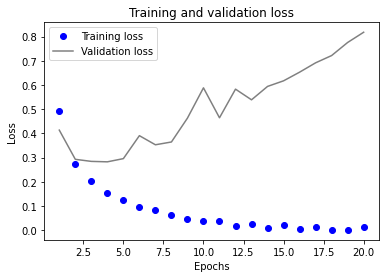

In [45]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy'] # edit.
epochs = range (1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'grey', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # ?
plt.show()

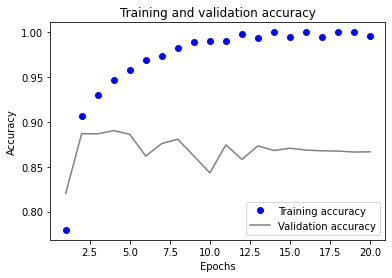

In [46]:
plt.clf() # clean image
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'grey', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
# Бинарную перекресную энтропию заменить на mse - потери на новых данных минимальны
model_5 = models.Sequential()

model_5.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model_5.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model_5.add(layers.Dense(1, activation='sigmoid'))

model_5.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
history = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1659 - accuracy: 0.7795 - val_loss: 0.1232 - val_accuracy: 0.8540
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0893 - accuracy: 0.9047 - val_loss: 0.0935 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0620 - accuracy: 0.9323 - val_loss: 0.0980 - val_accuracy: 0.8664
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0501 - accuracy: 0.9459 - val_loss: 0.0826 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0388 - accuracy: 0.9597 - val_loss: 0.0919 - val_accuracy: 0.8753
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0309 - accuracy: 0.9705 - val_loss: 0.0867 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0256 - accuracy: 0.9762 - val_loss: 0.0866 - val_accuracy: 0.8821
Epoch 8/20
30

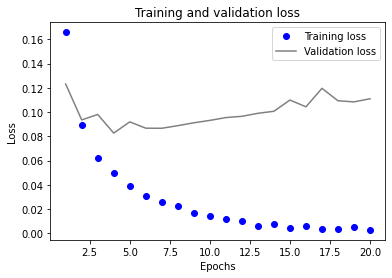

In [48]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy'] # edit.
epochs = range (1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'grey', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # ?
plt.show()

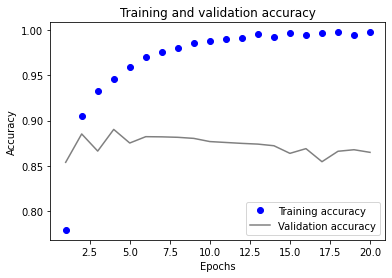

In [49]:
plt.clf() # clean image
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'grey', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [50]:
# Функцию привода отриц. значений к нулю relu заменить на tanh - много моментов переучивания
model_5 = models.Sequential()

model_5.add(layers.Dense(16, activation='tanh', input_shape = (10000,)))
model_5.add(layers.Dense(16, activation='tanh', input_shape = (10000,)))
model_5.add(layers.Dense(1, activation='sigmoid'))

model_5.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4829 - accuracy: 0.7911 - val_loss: 0.3475 - val_accuracy: 0.8750
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2699 - accuracy: 0.9081 - val_loss: 0.3300 - val_accuracy: 0.8604
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1954 - accuracy: 0.9314 - val_loss: 0.2781 - val_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1424 - accuracy: 0.9526 - val_loss: 0.2821 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1132 - accuracy: 0.9615 - val_loss: 0.3638 - val_accuracy: 0.8669
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0884 - accuracy: 0.9713 - val_loss: 0.3444 - val_accuracy: 0.8782
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0662 - accuracy: 0.9799 - val_loss: 0.4078 - val_accuracy: 0.8671
Epoch 8/20
30

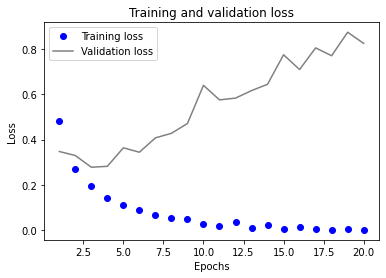

In [51]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy'] # edit.
epochs = range (1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'grey', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # ?
plt.show()

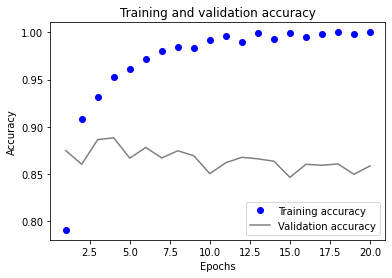

In [52]:
plt.clf() # clean image
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'grey', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()